predcting prices TCS

In [1]:
import math
import numpy as np
import pandas_datareader as web
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

df=web.DataReader('TCS.NS', data_source='yahoo', start ='2015-01-01', end='2020-08-01')
df

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-01,1283.500000,1270.500000,1283.500000,1272.780029,366830.0,1089.075073
2015-01-02,1295.469971,1275.300049,1275.500000,1289.719971,925740.0,1103.570190
2015-01-05,1299.949951,1262.319946,1290.500000,1270.119995,1754242.0,1086.799072
2015-01-06,1264.550049,1220.000000,1264.550049,1223.300049,2423784.0,1046.736816
2015-01-07,1239.569946,1203.719971,1235.000000,1208.849976,2636332.0,1034.372314
...,...,...,...,...,...,...
2020-07-27,2215.000000,2163.500000,2165.000000,2206.800049,4248480.0,2206.800049
2020-07-28,2320.000000,2215.000000,2215.000000,2309.750000,8092319.0,2309.750000
2020-07-29,2342.000000,2246.050049,2292.000000,2276.050049,6090431.0,2276.050049


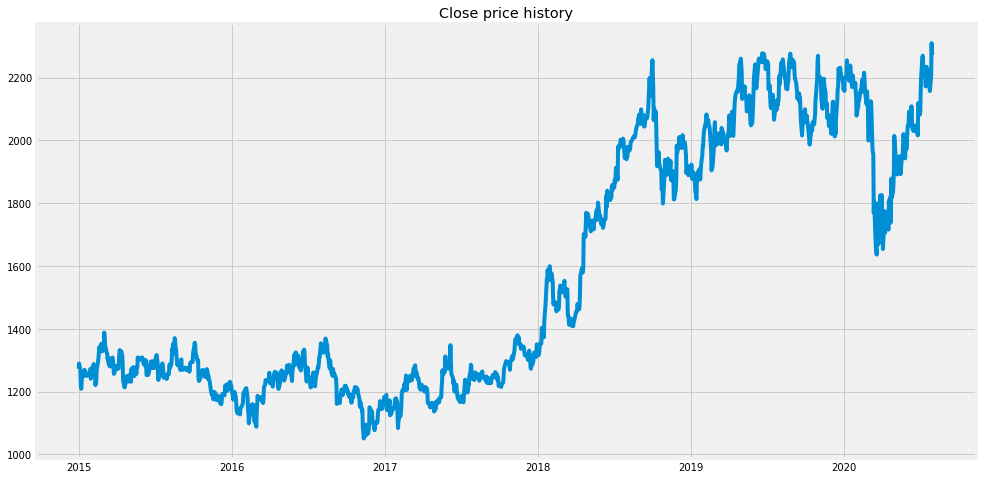

In [2]:
df.shape
plt.figure(figsize=(15,8))
plt.title('Close price history')
plt.plot(df['Close'])
plt.show()


In [3]:
data=df.filter(['Close'])
dataset=data.values
train_data_len= math.ceil(len(dataset) * .8)
train_data_len


1099

In [4]:
sc=MinMaxScaler(feature_range=(0,1))
scaled_data=sc.fit_transform(dataset)

In [5]:
train_data=scaled_data[0: train_data_len , : ]
x_train=[]
y_train=[]
for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i,0])
  if i<=60:
    print(x_train)
    print(y_train)
    print()


[array([0.17647205, 0.1899252 , 0.17435954, 0.13717665, 0.12570087,
       0.1360648 , 0.16326504, 0.16223258, 0.15754697, 0.16709288,
       0.1739069 , 0.17114312, 0.16274881, 0.15855558, 0.16386066,
       0.16376537, 0.15981043, 0.1591989 , 0.17410544, 0.17610667,
       0.15125723, 0.16401946, 0.18150704, 0.1640592 , 0.17918804,
       0.18846396, 0.16350323, 0.13500849, 0.14245779, 0.14334725,
       0.17377186, 0.19205361, 0.21224129, 0.2302769 , 0.22809294,
       0.2364634 , 0.23968777, 0.2267587 , 0.22050065, 0.22285146,
       0.22564684, 0.26797602, 0.2560635 , 0.23638401, 0.21667281,
       0.21504473, 0.20069416, 0.20565771, 0.19108475, 0.18311923,
       0.19161678, 0.18195182, 0.19659623, 0.20243334, 0.20489524,
       0.19463466, 0.18766979, 0.16358272, 0.16425775, 0.1838498 ])]
[0.17979956380887518]



In [6]:
x_train, y_train=np.array(x_train), np.array(y_train)
x_train=np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1 ))


model=Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=1, epochs=1)

1039/1039 [==============================] - 21s 21ms/step - loss: 0.0032


In [7]:
test_data=scaled_data[train_data_len - 60: , :]
x_test=[]
y_test=dataset[train_data_len: , :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])
  

In [8]:
x_test=np.array(x_test)
x_test=np.reshape(x_test,  (x_test.shape[0], x_test.shape[1], 1 ) )

pred=model.predict(x_test)
pred = sc.inverse_transform(pred)


In [9]:
rmse=np.sqrt(np.mean(pred - y_test)**2)
rmse

3.5053599559477644

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


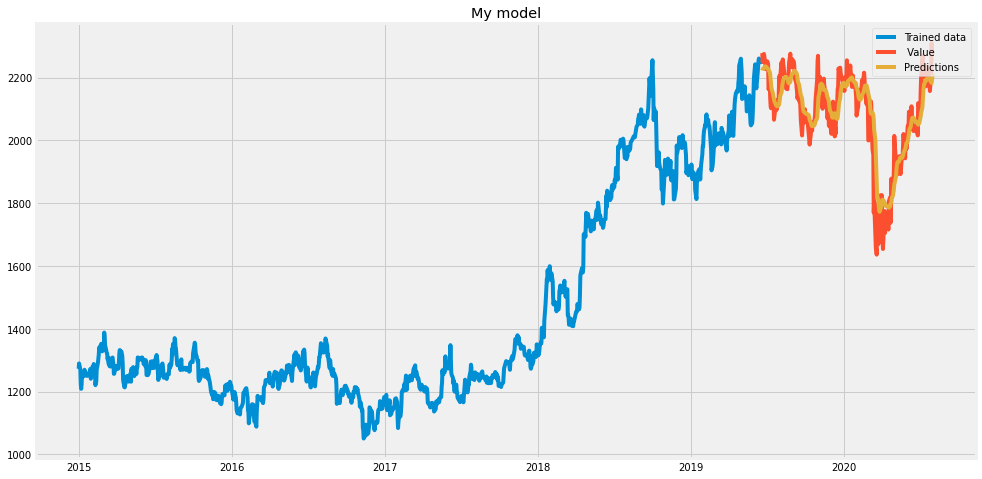

In [10]:
train=data[:train_data_len]
valid=data[train_data_len:]
valid['Predictions']=pred
plt.figure(figsize=(15,8))
plt.title('My model')

plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']]) 
plt.legend(['Trained data', ' Value', 'Predictions'], loc= 'upper right')
plt.show()


In [11]:
valid

,Close,Predictions
Date,,
2019-06-20,2277.949951,2222.819824
2019-06-21,2249.850098,2227.590332
2019-06-24,2275.500000,2229.765625
2019-06-25,2267.800049,2232.864014
2019-06-26,2254.199951,2235.273438
...,...,...
2020-07-27,2206.800049,2185.422852
2020-07-28,2309.750000,2183.134521
2020-07-29,2276.050049,2192.059814
